In [41]:
import glob
import pandas as pd
import random

from matplotlib import pyplot as plt

In [29]:
seed_list = []
N_list = []
M_list = []
D_list = []
K_list = []
input_data_list = []

for path in glob.glob('../testcase/*.txt'):
    seed = int(path.split('/')[-1].replace('.txt', ''))

    lines = []

    with open(path) as f:
        for line in f.readlines():
            lines.append(line.replace('\n', ''))

    N, M, D, K = map(int, lines[0].split(' '))
    input_data = ' '.join(lines)

    seed_list.append(seed)
    N_list.append(N)
    M_list.append(M)
    D_list.append(D)
    K_list.append(K)
    
    input_data_list.append(input_data)

In [30]:
test_set_df = pd.DataFrame()

test_set_df['seed'] = seed_list
test_set_df['N'] = N_list
test_set_df['M'] = M_list
test_set_df['D'] = D_list
test_set_df['K'] = K_list
test_set_df['input_data'] = input_data_list

In [31]:
test_set_df.sort_values('seed', inplace=True)
test_set_df.reset_index(drop=True, inplace=True)

## Stress test

In [40]:
test_set_df.to_csv('03_test_stress.csv', index=False)

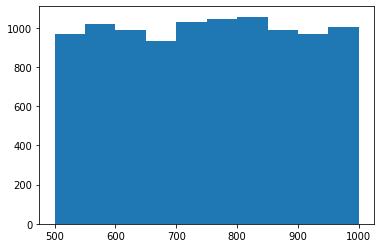

In [33]:
plt.hist(test_set_df['N']);

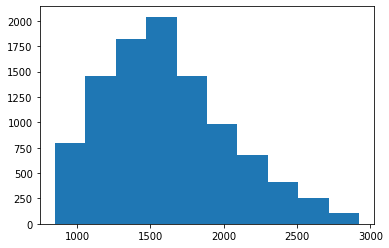

In [34]:
plt.hist(test_set_df['M']);

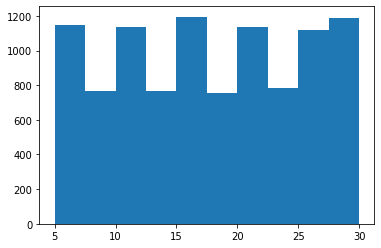

In [35]:
plt.hist(test_set_df['D']);

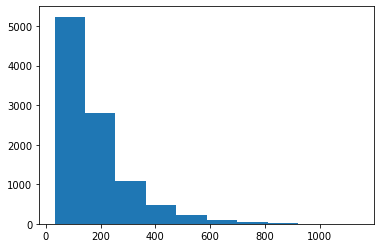

In [36]:
plt.hist(test_set_df['K']);

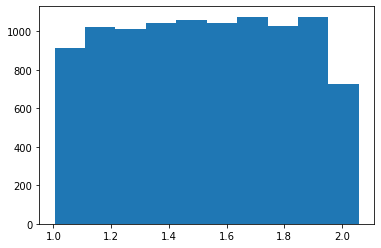

In [39]:
plt.hist(test_set_df['K']/(test_set_df['M'] // test_set_df['D']));

## System test

In [50]:
index_list = test_set_df.index.to_list()
random.shuffle(index_list)

In [51]:
index_list = index_list[:2000]
sys_set_df = test_set_df.loc[index_list,:]

In [53]:
sys_set_df.to_csv('02_test_sys.csv', index=False)

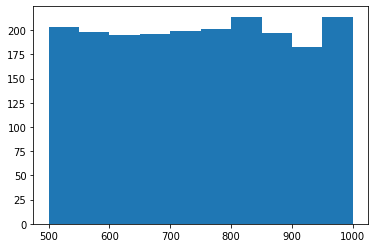

In [54]:
plt.hist(sys_set_df['N']);

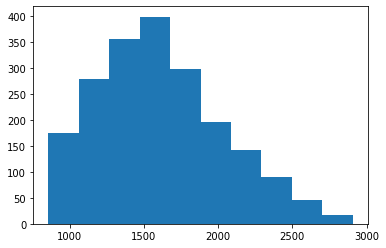

In [55]:
plt.hist(sys_set_df['M']);

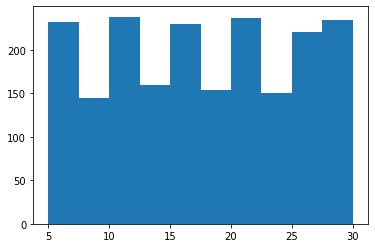

In [56]:
plt.hist(sys_set_df['D']);

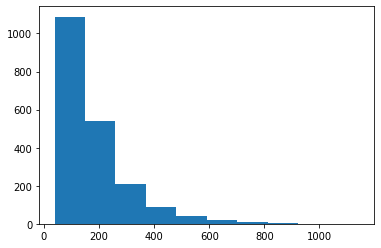

In [57]:
plt.hist(sys_set_df['K']);

## Pre test

In [58]:
index_list = index_list[:50]
pre_set_df = test_set_df.loc[index_list,:]

In [60]:
pre_set_df.to_csv('01_test_pre.csv', index=False)

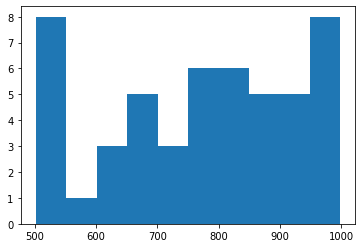

In [61]:
plt.hist(pre_set_df['N']);

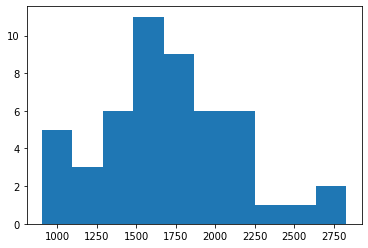

In [62]:
plt.hist(pre_set_df['M']);

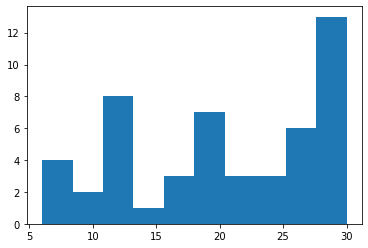

In [63]:
plt.hist(pre_set_df['D']);

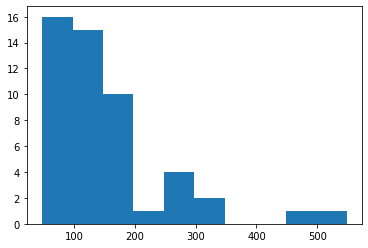

In [64]:
plt.hist(pre_set_df['K']);